In [67]:
# import required libraries
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# [CONFIGS] --------------------------------------
mpl.rcParams['figure.dpi'] = 120

# Deskriptive Statistik



## Eindimensionale Daten

In [68]:
from pandas import Series
import pandas as pd
import numpy as np

methodeA = Series([79.98, 80.04, 80.02, 80.04, 80.03, 80.03, 80.04, 79.97, 80.05, 80.03, 80.02, 80.00, 80.02])

methodeA.sort_values()

7     79.97
0     79.98
11    80.00
2     80.02
10    80.02
12    80.02
4     80.03
5     80.03
9     80.03
1     80.04
3     80.04
6     80.04
8     80.05
dtype: float64

### Mittelwert

In [69]:
print(methodeA.mean())

80.02076923076923


### Varianz

In [70]:
methodeA.var()

0.0005743589743590099

### Standardabweichung

In [71]:
methodeA.std()

0.023965787580611863

### Median $x_{(n)}$

Beispiel $x_1 = 3, x_2 = 7, x_3 = 2$:

$$
x_{(1)} = x_3 = 2 \qquad x_{(2)} = x_1 = 3\qquad x_{(3)} = x_2 = 7
$$

In [72]:
methodeA.sort_values()

7     79.97
0     79.98
11    80.00
2     80.02
10    80.02
12    80.02
4     80.03
5     80.03
9     80.03
1     80.04
3     80.04
6     80.04
8     80.05
dtype: float64

In [73]:
methodeA.median() # same as: methodeA.quantile(0.5)

80.03

#### Gerade Anzahl Elemente

In [74]:
methodeB = Series([80.02, 79.94, 79.98, 79.97, 79.98, 80.03, 79.95, 79.97])
methodeB.median()

79.975

### Quartile

Die `methodeA` Länge ist $13$ Elemente. Der Untere Quartil-Index ist $13\cdot 0.25 = 3.25$. Da der Index nur ganzzahlig ist, wird der **nächstgrössere** Wert genommen, also $x_{(4)}$.

In [75]:
print("methodeA:",
      methodeA.quantile(0.25, interpolation="higher"),
      methodeA.median(),
      methodeA.quantile(0.75))
print("methodeB:", methodeB.quantile(0.25), methodeB.median(), methodeB.quantile(0.75))

methodeA: 80.02 80.03 80.04
methodeB: 79.965 79.975 79.99000000000001


### Quartilsdifferenz

In [76]:
q75, q25 = methodeA.quantile(q = [.75, .25], interpolation="lower")

iqr = q75 - q25
iqr

0.020000000000010232

### Empirische $\alpha$-Quantile ($0< \alpha < 1$)

In [77]:
print(methodeA.quantile(q=0.1, interpolation="lower"))
print(methodeA.quantile(q=0.7, interpolation="lower"))

79.98
80.03


---

In [78]:
noten = Series([4.2, 2.3, 5.6, 4.5, 4.8, 3.9, 5.9, 2.4, 5.9, 6, 4, 3.7, 5, 5.2, 4.5, 3.6, 5, 6, 2.8, 3.3, 5.5, 4.2, 4.9, 5.1])
noten.quantile(q = np.linspace(.2,1,5), interpolation="lower")

0.2    3.6
0.4    4.2
0.6    4.9
0.8    5.5
1.0    6.0
dtype: float64

---

## Zweidimensionaler Daten (SW2)

### Weinkonsum & Mortalität Herzerkrankung

In [79]:
wkm = pd.DataFrame({
    "wine": ([2.8, 3.2, 3.2, 3.4, 4.3, 4.9, 5.1, 5.2, 5.9,
              5.9, 6.6, 8.3, 12.6, 15.1, 25.1, 33.1, 75.9, 75.9]),
    "mor": ([6.2, 9.0, 7.1, 6.8, 10.2, 7.8, 9.3, 5.9, 8.9,
             5.5, 7.1, 9.1, 5.1, 4.7, 4.7, 3.1, 3.2, 2.1])
})
wkm.index = pd.Index(["Norwegen", "Schottland", "Grossbritannien", "Irland", "Finnland", "Kanada", "VereinigteStaaten", "Niederlande",
                      "NewZealand", "Dänemark", "Schweden", "Australien", "Belgien", "Deutschland", "Österreich", "Schweiz", "Italien", "Frankreich"])

wkm

,wine,mor
Norwegen,2.8,6.2
Schottland,3.2,9.0
Grossbritannien,3.2,7.1
Irland,3.4,6.8
Finnland,4.3,10.2
Kanada,4.9,7.8
VereinigteStaaten,5.1,9.3
Niederlande,5.2,5.9
NewZealand,5.9,8.9
Dänemark,5.9,5.5


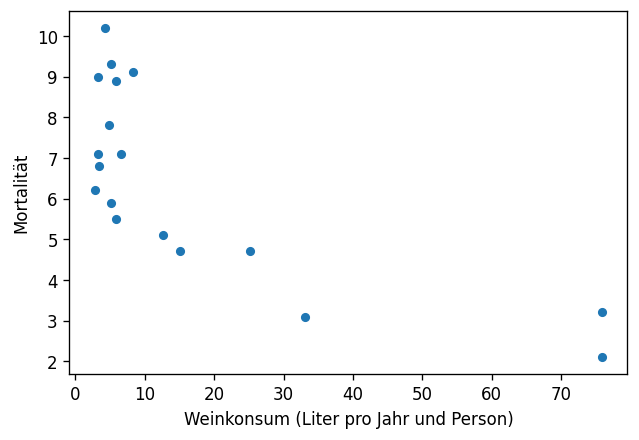

In [80]:
wkm.plot(kind="scatter", x="wine", y="mor")
plt.xlabel("Weinkonsum (Liter pro Jahr und Person)")
plt.ylabel("Mortalität")
plt.show()


### Regressionsgerade und Residuum


In [95]:
book = pd.DataFrame({
  "pages": np.linspace(50,500,10),
  "prices": ([6.4,9.5,15.6,15.1,17.8,23.4,23.4,22.5,26.1,29.1])
})
book.index = pd.Index(["Buch 1","Buch 2","Buch 3","Buch 4","Buch 5","Buch 6","Buch 7","Buch 8","Buch 9","Buch 10"])

book

,pages,prices
Buch 1,50.0,6.4
Buch 2,100.0,9.5
Buch 3,150.0,15.6
Buch 4,200.0,15.1
Buch 5,250.0,17.8
Buch 6,300.0,23.4
Buch 7,350.0,23.4
Buch 8,400.0,22.5
Buch 9,450.0,26.1
Buch 10,500.0,29.1


Text(0, 0.5, 'Buchpreis')

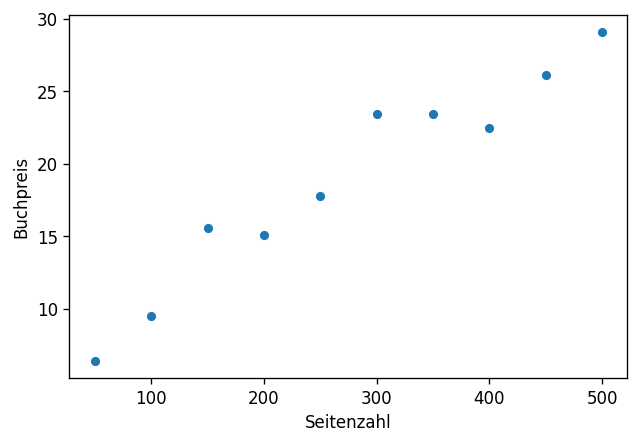

In [103]:
book.plot(kind="scatter", x="pages", y="prices")
plt.xlabel("Seitenzahl")
plt.ylabel("Buchpreis")

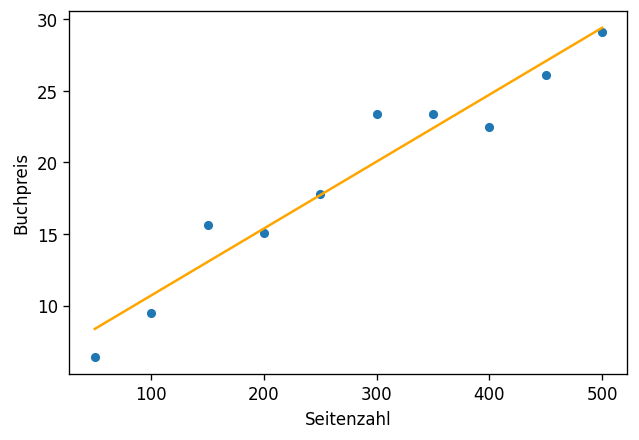

In [105]:
# draw same scatter graph with regression
# prepare data
x = np.linspace(book["pages"].min(), book["pages"].max())
b, a = np.polyfit(book["pages"], book["prices"], deg=1)

# plot
book.plot(kind="scatter", x="pages", y="prices")
plt.plot(x, a+b*x, c="orange")

plt.xlabel("Seitenzahl")
plt.ylabel("Buchpreis")
plt.show()

### Empirische Korrelation

$$
r = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{(\sum_{i=1}^{n}(x_i - \overline{x})^2)\cdot(\sum_{i=1}^{n}(y_i - \overline{y})^2)}} = \frac{\text{cov}_{xy}}{s_x \cdot s_y}
$$

$$
s_m^2 = \sum_{i=1}^{n}(m_i - \overline{m})^2
$$

In [112]:
book.corr().iloc[0,1]

0.9681121878410436

In [125]:
print(f"{np.sum((book['pages']-book['pages'].mean())*(book['prices']-book['prices'].mean()))/(len(book.index)-1)} <-> {book.cov().iloc[0,1]}")

book.cov()

1070.8333333333333 <-> 1070.8333333333333


,pages,prices
pages,22916.666667,1070.833333
prices,1070.833333,53.387667
